In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

### Major and Minor Ticks

Matplotlib rarely makes use of minor
ticks, but one place you can see them is within logarithmic plots

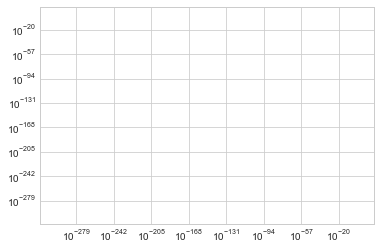

In [9]:
%matplotlib inline
plt.style.use('seaborn-whitegrid')
ax=plt.axes(xscale='log',yscale='log')

We see here that each major tick shows a large tick mark and a label, while each
minor tick shows a smaller tick mark with no label.
We can customize these tick properties—that is, locations and labels—by setting the
formatter and locator objects of each axis.

In [6]:
plt.axes?

In [8]:
print(ax.xaxis.get_major_locator())
print(ax.xaxis.get_minor_locator())
print(ax.xaxis.get_major_formatter())
print(ax.xaxis.get_minor_formatter())

We see that both major and minor tick labels have their locations specified by a
LogLocator (which makes sense for a logarithmic plot). Minor ticks, though, have
their labels formatted by a NullFormatter; this says that no labels will be shown

### Hiding Ticks or Labels

Perhaps the most common tick/label formatting operation is the act of hiding ticks or
labels. We can do this using plt.NullLocator() and plt.NullFormatter()

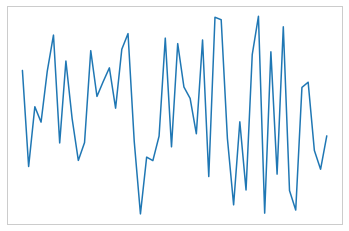

In [13]:
ax=plt.axes()
ax.plot(np.random.rand(50))
ax.xaxis.set_major_locator(plt.NullLocator())
#ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.set_major_locator(plt.NullLocator()) # same null locator or null formatter can also be used for both

 Having no ticks at
all can be useful in many situations—for example, when you want to show a grid of
images.

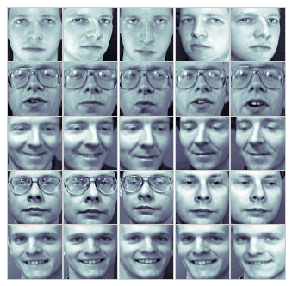

In [28]:
fig,ax=plt.subplots(5,5,figsize=(5,5))
fig.subplots_adjust(hspace=0,wspace=0)

from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces().images

for i in range(5):
    for j in range(5):
        ax[i, j].xaxis.set_major_locator(plt.NullLocator())
        ax[i, j].yaxis.set_major_locator(plt.NullLocator())
        ax[i, j].imshow(faces[10 * i + j], cmap="bone")    # maybe there are 10 photos of every individual and hence 
        # after every 5th image 11th is the next

Notice that each image has its own axes, and we’ve set the locators to null because the
tick values (pixel number in this case) do not convey relevant information for this
particular visualization.

### Reducing or Increasing the Number of Ticks

One common problem with the default settings is that smaller subplots can end up
with crowded labels

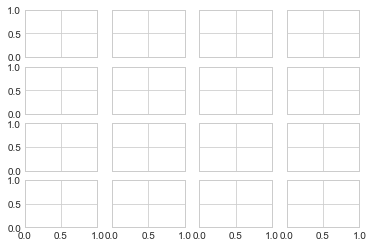

In [29]:
fig,ax=plt.subplots(4,4,sharex=True,sharey=True)

Particularly for the x ticks, the numbers nearly overlap, making them quite difficult to
decipher. We can fix this with the plt.MaxNLocator(), which allows us to specify the
maximum number of ticks that will be displayed. 

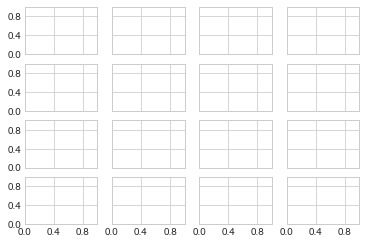

In [31]:
# For every axis, set the x and y major locator
for axi in ax.flat:
   axi.xaxis.set_major_locator(plt.MaxNLocator(3))
   axi.yaxis.set_major_locator(plt.MaxNLocator(3))
fig

In [33]:
ax.flat?

This makes things much cleaner. If you want even more control over the locations of
regularly spaced ticks, you might also use plt.MultipleLocator, which we’ll discuss
in the following section.

### Fancy Tick Formats

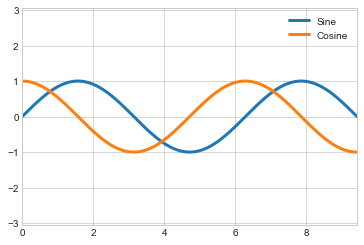

In [36]:
# Plot a sine and cosine curve
fig, ax = plt.subplots()
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')

# Set up grid, legend, and limits
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi);


In [37]:
ax.set_xlim?

There are a couple changes we might like to make. First, it’s more natural for this data
to space the ticks and grid lines in multiples of π. We can do this by setting a Multi
pleLocator, which locates ticks at a multiple of the number you provide. For good
measure, we’ll add both major and minor ticks in multiples of π/4

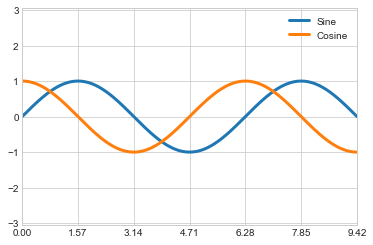

In [39]:
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))
fig

But now these tick labels look a little bit silly: we can see that they are multiples of π,
but the decimal representation does not immediately convey this. To fix this, we can
change the tick formatter. There’s no built-in formatter for what we want to do, so
we’ll instead use plt.FuncFormatter

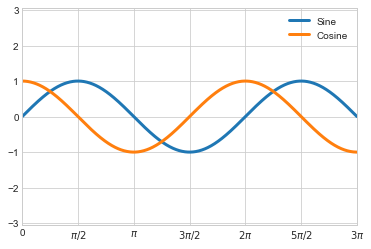

In [41]:
def format_func(value, tick_number):
  # find number of multiples of pi/2
  N = int(np.round(2 * value / np.pi))
  if N == 0:
     return "0"
  elif N == 1:
     return r"$\pi/2$"
  elif N == 2:
     return r"$\pi$"
  elif N % 2 > 0:
     return r"${0}\pi/2$".format(N)
  else:
     return r"${0}\pi$".format(N // 2)
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
fig

This is much better! Notice that we’ve made use of Matplotlib’s LaTeX support, speci‐
fied by enclosing the string within dollar signs. This is very convenient for display of
mathematical symbols and formulae; in this case, "$\pi$" is rendered as the Greek
character π.

## Customizing Matplotlib: Configurations and Stylesheets

### Plot Customization by Hand

 It’s possible to do these customizations for each individual plot. For example, here is a fairly
drab default histogram

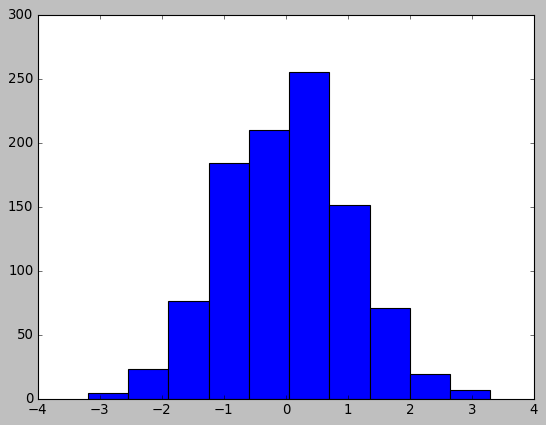

In [45]:
plt.style.use('classic')
x=np.random.randn(1000)
plt.hist(x);

We can adjust this by hand to make it a much more visually pleasing plot

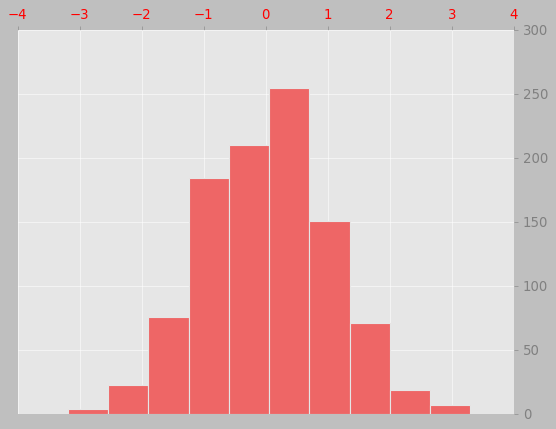

In [95]:
# set gray background
ax=plt.axes()  #   axisbg='#E6E6E6'  is not working for gray background
ax.set_facecolor('#E6E6E6')   # instead of using above axisbg , now this is working 
ax.set_axisbelow(True)    # ticks and gridlines are set below all artists
# draw solid white grid lines
plt.grid(color='w', linestyle='solid')
 # hide axis spines
for spine in ax.spines.values():
    spine.set_visible(False)
 # hide top and right ticks
ax.xaxis.tick_top()   # This can be bottom or top
ax.yaxis.tick_right()   # This can be right or left
 # lighten ticks and labels
ax.tick_params(colors='gray', direction='out')   # direction can be in or out based on our desires
for ticks in ax.get_xticklabels():
    ticks.set_color('red')   # set it red to clearly visualise where change occurs
for tick in ax.get_yticklabels():
    tick.set_color('gray')
 # control face and edge color of histogram
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');

In [77]:
ax.set_facecolor?

This looks better, and you may recognize the look as inspired by the look of the R
language’s ggplot visualization package. But this took a whole lot of effort! We defi‐
nitely do not want to have to do all that tweaking each time we create a plot. Fortu‐
nately, there is a way to adjust these defaults once in a way that will work for all plots.


### Changing the Defaults: rcParams

Each time Matplotlib loads, it defines a runtime configuration (rc) containing the
default styles for every plot element you create. You can adjust this configuration at
any time using the plt.rc convenience routine.

We’ll start by saving a copy of the current rcParams dictionary, so we can easily reset
these changes in the current session

In [81]:
IPython_default=plt.rcParams.copy()

Now we can use the plt.rc function to change some of these settings

In [82]:
from matplotlib import cycler

(array([  4.,  23.,  76., 184., 210., 255., 151.,  71.,  19.,   7.]),
 array([-3.19289384, -2.54376329, -1.89463274, -1.24550219, -0.59637164,
         0.05275891,  0.70188946,  1.35102001,  2.00015056,  2.64928111,
         3.29841166]),
 <a list of 10 Patch objects>)

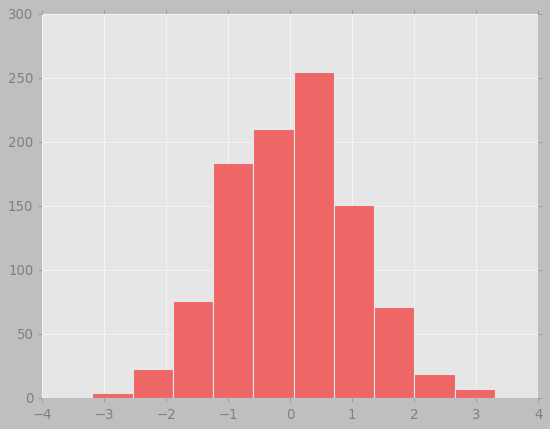

In [96]:
colors = cycler('color',['#EE6666', '#3388BB', '#9988DD', '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)
plt.hist(x)

Let’s see what simple line plots look like with these rc parameters

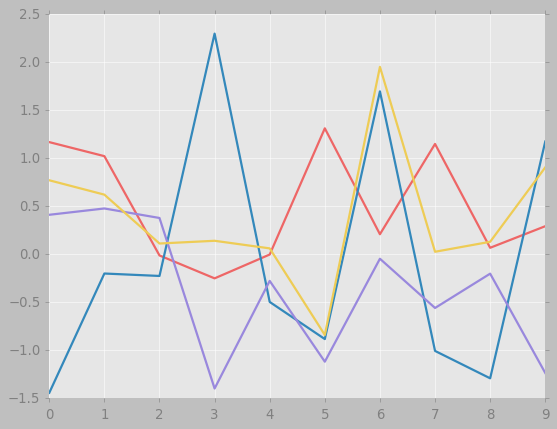

In [97]:
for i in range (4):   # bcause of this plt.rc set before now every plot appears similar
    plt.plot(np.random.randn(10))

 the good news is that you can adjust the rc parameters to
suit your own tastes! These settings can be saved in a .matplotlibrc file, which you can
read about in the Matplotlib documentation. That said, I prefer to customize Mat‐
plotlib using its stylesheets instead.

## Stylesheets

The version 1.4 release of Matplotlib in August 2014 added a very convenient style
module, which includes a number of new default stylesheets, as well as the ability to
create and package your own styles. These stylesheets are formatted similarly to
the .matplotlibrc files mentioned earlier, but must be named with a .mplstyle
extension

Even if you don’t create your own style, the stylesheets included by default are
extremely useful. The available styles are listed in plt.style.available

In [98]:
plt.style.available[:5] # to use type plt.style.use()


['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight']

The basic way to switch to a stylesheet is to call:
            
          plt.style.use('stylename')
But keep in mind that this will change the style for the rest of the session! Alterna‐
tively, you can use the style context manager, which sets a style temporarily

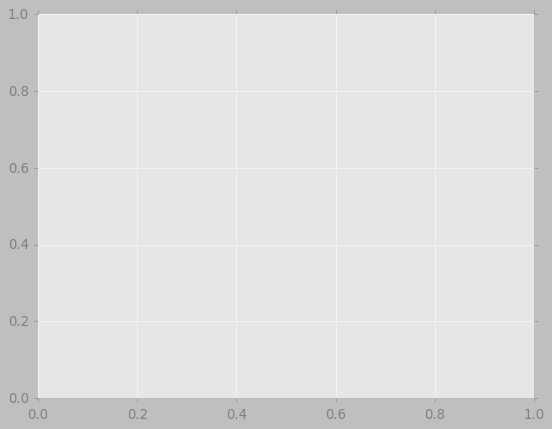

In [104]:
with plt.style.context('fast'):
   plt.plot()

#     with plt.style.context('stylename'):
 #         make_a_plot()

Let’s create a function that will make two basic types of plot:

In [106]:
def hist_and_lines():
   np.random.seed(0)
   fig, ax = plt.subplots(1, 2, figsize=(11, 4))
   ax[0].hist(np.random.randn(1000))
   for i in range(3):
      ax[1].plot(np.random.rand(10))
      ax[1].legend(['a', 'b', 'c'], loc='lower left')

### Default style

 First, let’s reset our runtime configuration to the notebook default:

In [108]:
plt.rcParams.update(IPython_default)  # sets the subplots to default
# When we used rcParams , default was set to the plots visible uptill now

C:\Users\gdg13\anaconda\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
C:\Users\gdg13\anaconda\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\gdg13\anaconda\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
C:\Users\gdg13\anaconda\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
C:\Users\gdg13\anaconda\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.level rcparam was deprecated in 

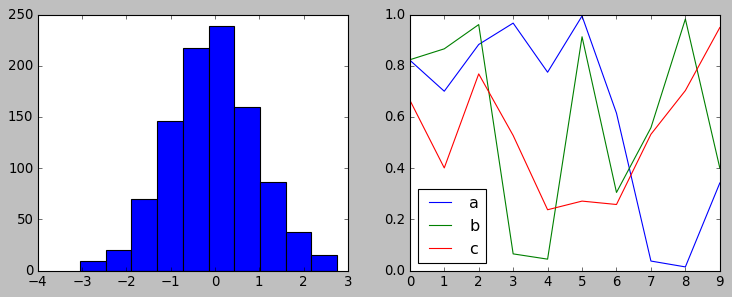

In [109]:
hist_and_lines()

now to view how these plots in different backgrounds , let's see different cases

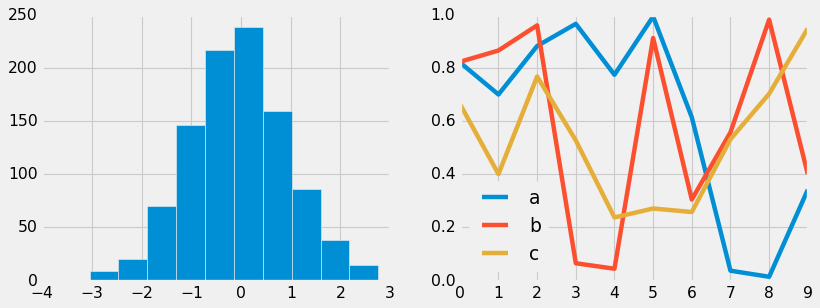

In [110]:
with plt.style.context('fivethirtyeight'):
     hist_and_lines()


### ggplot

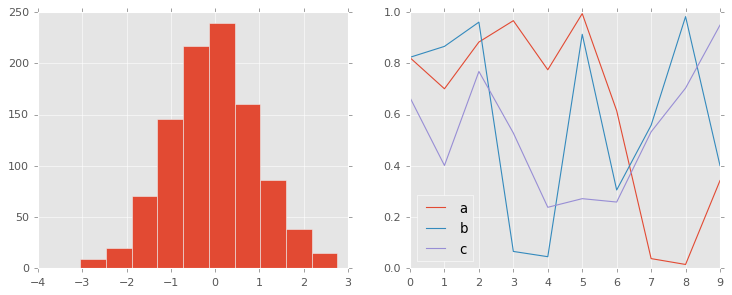

In [111]:
with plt.style.context('ggplot'):
     hist_and_lines()

bmh, dark_background, grayscale 

import seaborn 

hist_and_lines()

## Three-Dimensional Plotting in Matplotlib


We enable three-dimensional plots by importing the mplot3d toolkit, included with the main Matplotlib installation 

In [115]:
# from matplotlib import mplot3d doesn't works anymore whereas below import is done
from mpl_toolkits.mplot3d import Axes3D

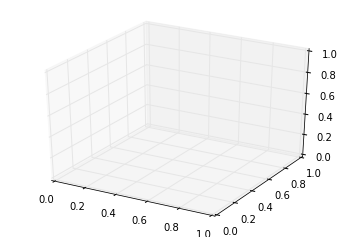

In [122]:
# %matplotlib notebook is showing nothing just a blank space
%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection='3d')

With this 3D axes enabled, we can now plot a variety of three-dimensional plot types.
Three-dimensional plotting is one of the functionalities that benefits immensely from
viewing figures interactively rather than statically in the notebook; recall that to use
interactive figures, you can use %matplotlib notebook rather than %matplotlib
inline when running this code

### Three-Dimensional Points and Lines

The most basic three-dimensional plot is a line or scatter plot created from sets of (x,
y, z) triples

 In analogy with the more common two-dimensional plots discussed earlier, we can create these using the ax.plot3D and ax.scatter3D functions.
 Here we’ll plot a trigonometric spiral, along with some points drawn randomly near the line

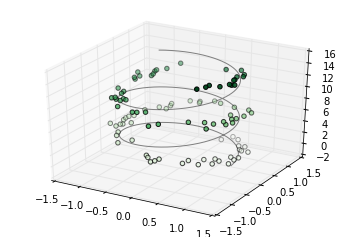

In [125]:
ax=plt.axes(projection='3d')

# Plotting 3D line 
zline=np.linspace(0,15,1000)
yline=np.sin(zline)
xline=np.cos(zline)
ax.plot3D(xline,yline,zline,'gray')

# Scattering points in 3D plot
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

### Three-Dimensional Contour Plots

Analogous to the contour plots,, mplot3d contains tools to create three-dimensional relief plots using the same
inputs. Like two-dimensional ax.contour plots, ax.contour3D requires all the input
data to be in the form of two-dimensional regular grids, with the Z data evaluated at
each point

In [126]:
def f(x,y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x=np.linspace(-6,6,30)
y=np.linspace(-6,6,30)

X,Y=np.meshgrid(x,y)
Z=f(X,Y)


Text(0.5, 0, 'z')

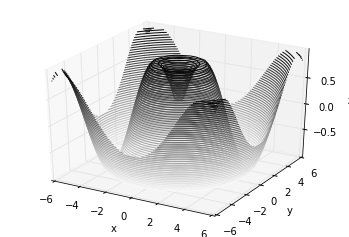

In [139]:
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.contour3D(X,Y,Z,50,cmap='binary')       # more this value increased, it becomes more flawless
#  50 equally spaced intervals within the data range
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [141]:
ax.contour3D?

Sometimes the default viewing angle is not optimal, in which case we can use the
view_init method to set the elevation and azimuthal angles.  we’ll use an elevation of 60 degrees (that is,
60 degrees above the x-y plane) and an azimuth of 35 degrees (that is, rotated 35
degrees counter-clockwise about the z-axis)

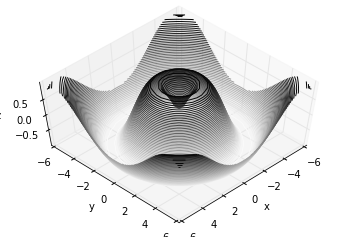

In [149]:
ax.view_init(60,45)
fig

### Wireframes and Surface Plots

Two other types of three-dimensional plots that work on gridded data are wireframes
and surface plots. These take a grid of values and project it onto the specified threedimensional surface, and can make the resulting three-dimensional forms quite easy
to visualize

Text(0.5, 0.92, 'wireframe')

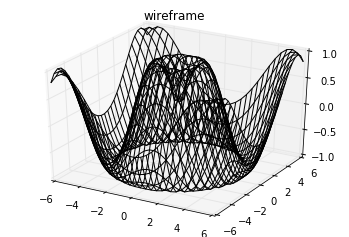

In [150]:
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.plot_wireframe(X,Y,Z,color='black')
ax.set_title('wireframe')

A surface plot is like a wireframe plot, but each face of the wireframe is a filled poly‐
gon. Adding a colormap to the filled polygons can aid perception of the topology of
the surface being visualized 

Text(0.5, 0.92, 'surface plot')

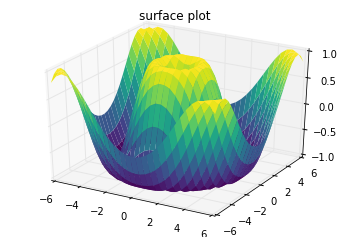

In [154]:
ax=plt.axes(projection='3d')
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap='viridis',edgecolor='none')  # setting edgecolor=None gives a diff dark wireframe
ax.set_title('surface plot')

Note that though the grid of values for a surface plot needs to be two-dimensional, it
need not be rectilinear. Here is an example of creating a partial polar grid, which
when used with the surface3D plot can give us a slice into the function we’re visualiz‐
ing

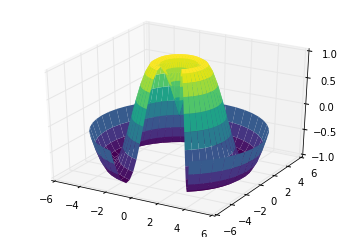

In [156]:
r=np.linspace(0,6,20)
theta=np.linspace(-0.9*np.pi,0.8*np.pi,40)
r,theta=np.meshgrid(r,theta)

X=r*np.sin(theta)
Y=r*np.cos(theta)
Z=f(X,Y)

ax=plt.axes(projection='3d')
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap='viridis',edgecolor='none');

### Surface Triangulations